In [3]:
#################### XOR ####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#################### Hyperparameters
data = np.array([[1,1,0],
                 [1,0,1],
                 [0,1,1],
                 [0,0,0]])

X_data = data[:, :-1]
Y_data = data[:, -1]

epoch = 2000
etta = 0.05
train_rate = 0.7
val_rate = 0.1
test_rate = 0.2

L = 2
D = {1:2, 2:2}

M = 4
N = 2


In [4]:

def my_func(arr):
    idx = int(arr[0])
    arr[idx+1] = 1
    return arr

Y_data_m = np.zeros((M, 2))

new_1 = np.hstack((np.reshape(Y_data,(M,1)), Y_data_m))

Y_data_m = np.apply_along_axis(my_func, 1, new_1)
Y_data_m = Y_data_m[:, 1:]


In [5]:
#################### Functions (Model)

def m(x):
    if x > 0:
        return x
    else:
        return 0


def relu(x):
    out = np.max((0,x))
    return out


def sigmoid(X):
    n = np.apply_along_axis(np.exp, 1, -1*X)
    out = 1 / (1 + n)
    return out


def softmax(X):
    new = np.apply_along_axis(np.exp, 1, X)
    D = np.sum(new, axis=1)
    new2 = np.apply_along_axis(np.exp, 1, X)
    S = new2/D[:, np.newaxis]
    return S


def grad_softmax(X):
    s = softmax(X)
    out = s - s**2
    return out



def grad_sigmoid(X):
    p1 = sigmoid(X)
    out = p1 - (p1**2)
    #out = np.hstack((np.zeros((n,1)), out))
    return out



def perceptron(X,W):
    l = X @ W
    out = relu(l)
    return out




#################### Functions (Test and Validation)

def MSE(Y, Y_hat, n):
    error = (1/n) * (Y - Y_hat)**2
    out = np.sum(error) 
    return out


def RMSE(Y, Y_hat, n):
    error = (1/n) * (Y - Y_hat)**2
    out = np.sum(error) 
    return np.sqrt(out)


def MAE(Y, Y_hat, n):
    error = (1/n) * np.abs(Y - Y_hat)
    out = np.sum(error)
    return out


def grad(X, Y, Y_hat, n):
    grad = (2/n) * (np.transpose(X) @ (Y_hat - Y))
    return grad



def R2(Y, Y_hat, n):
    s1 = np.sum((Y - Y_hat)**2)
    s2 = np.sum((Y - np.mean(Y_hat))**2)
    out = 1 - (s1/s2)
    return out


def cost_func(Y, Y_hat, n):
    Z = np.log(Y_hat) @ np.transpose(Y)
    out = (-1/n) * Z.trace()
    return out



In [6]:
#################### Neural Network Model
X = dict()
W = dict()
S = dict()
delta = dict()
G = dict()

X[0] = X_data

for l in range(1,L+1):
    if l == 1:
        W[l] = np.random.rand(N, D[l])
    else:
        W[l] = np.random.rand(D[l-1]+1, D[l])
        



In [7]:
        
L_train = np.array([])
L_val = np.array([])



for i in range(epoch):    

    for l in range(1,L+1):
        S[l] = X[l-1] @ W[l]
        if l < L:
            f = np.vectorize(relu)
            new_array = f(S[l])
            X[l] = np.hstack((np.ones((M,1)), new_array))
        else:
            X[l] = softmax(S[l])
            
    
    c_train = cost_func(Y_data_m, X[L], M)
    L_train = np.append(L_train, c_train)
    
        
    for l in range(L, 0, -1):
        if l < L:
            m,j = np.shape(grad_sigmoid(S[l]))
            arr = delta[l+1] @ np.transpose(W[l+1])
            delta[l] = 2 * grad_sigmoid(S[l]) * (arr[:, :j])
        else:
            delta[l] = 2 * grad_softmax(S[l]) * (X[l] - Y_data_m)
        
        
        
    for l in range(1, L+1):
        G[l] = (1/M) * (np.transpose(X[l-1]) @ delta[l])

    

    for l in range(1, L+1):
        W[l] = W[l] - (etta * G[l])
    
    
    


#################### Test and Validation

MSE_train = L_train[-1]



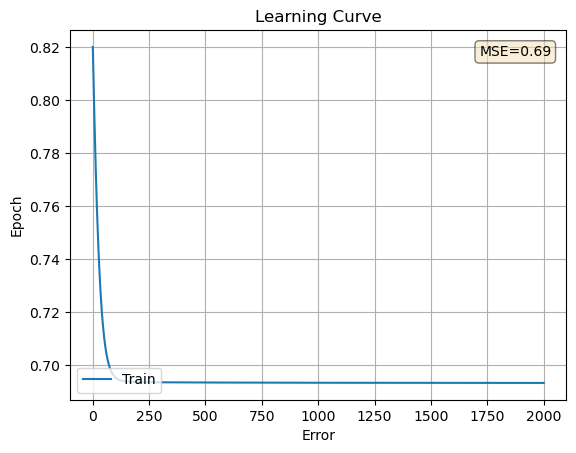

The MSE of Train Is:  0.6931847935242041


In [13]:
# Learning Curve

fig, ax = plt.subplots()

plt.plot(range(1, epoch+1), L_train, label='Train')
plt.title("Learning Curve")
plt.xlabel("Error")
plt.ylabel("Epoch")
plt.grid()
plt.legend(loc="lower left")

txt = '\n'.join((
    r'MSE=%.2f' % (MSE_train, ),))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.97, 0.96, txt, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)



plt.show()

print("The MSE of Train Is: ", MSE_train)
